In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/oh_merged.csv")
# remove Unamed: 0
# df.drop("Unnamed: 0")

/var/folders/wy/50c5sv7n4wsfhhww_wwjz2tr0000gn/T/ipykernel_27747/422020185.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/oh_merged.csv")


In [3]:
# df = df.drop("Unnamed: 0", axis=1)

In [4]:
# save
# df.to_csv("../data/oh_merged.csv")


In [5]:
# show head without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,LALVOTERID,Residence_Addresses_CensusBlock,Residence_Families_FamilyID,Residence_Addresses_Property_Land_Square_Footage,Residence_Addresses_Property_Type,Mailing_Addresses_State,Mailing_Addresses_Zip,Voters_Gender,Voters_Age,Voters_BirthDate,ConsumerData_Education_of_Person,EthnicGroups_EthnicGroup1Desc,ConsumerData_Inferred_HH_Rank,ConsumerData_Language_Code,ConsumerData_Marital_Status,ConsumerData_Single_Parent,ConsumerDataLL_Veteran,ConsumerData_African_American_Professional,ConsumerData_Business_Owner,ConsumerData_Occupation_Group,ConsumerData_Occupation_of_Person,ConsumerData_LikelyRecentEmployment_Executive_Level,ConsumerData_LikelyRecentEmployment_Executive_Department,Voters_PlaceOfBirth,Voters_Active,Voters_CalculatedRegDate,Voters_OfficialRegDate,Parties_Description,VoterParties_Change_Changed_Party,ConsumerData_Religion_Code,ConsumerData_Number_Of_Adults_in_HH,ConsumerData_Number_Of_Children_in_HH,ConsumerData_Number_Of_Persons_in_HH,ConsumerData_Disabled_In_HH,ConsumerData_Generations_In_HH,ConsumerData_Presence_Of_Children_in_HH,ConsumerData_Senior_Adult_In_HH,ConsumerData_Veteran_In_HH,ConsumerData_Young_Adult_In_HH,ConsumerData_Assimilation_Status,Residence_HHParties_Description,Residence_Families_HHVotersCount,County,Voters_FIPS,ConsumerData_RUS_Code,Residence_Addresses_Density,ConsumerData_AreaPcntHHWithChildren,ConsumerData_AreaPcntHHMarriedCoupleWithChild,ConsumerData_AreaPcntHHMarriedCoupleNoChild,ConsumerData_AreaPcntHHSpanishSpeaking,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range,ConsumerData_Home_Purchase_Year,ConsumerData_Home_Purchase_Date,ConsumerData_Home_Est_Current_Value_Code,ConsumerData_TaxAssessedValueTotal,ConsumerData_Home_Mortgage_Amount,ConsumerData_Home_Mortgage_Amount_Code,ConsumerData_Home_Purchase_Price,ConsumerData_Home_Purchase_Price_Code,ConsumerData_TaxMarketValueTotal,ConsumerData_Dwelling_Type,ConsumerData_AccessibilityHandicapFlag,Residence_Addresses_Property_Home_Square_Footage,ConsumerData_Homeowner_Probability_Model,ConsumerData_BedroomsCount,ConsumerData_RoomsCount,ConsumerData_CRA_Income_Classification_Code,ConsumerData_Credit_Rating,ConsumerData_Estimated_Income_Amount,ConsumerData_Household_Net_Worth,ConsumerData_AreaMedianHousingValue,ConsumerData_EstimatedAreaMedianHHIncome,ConsumerData_AreaMedianEducationYears,ConsumerData_Likely_Income_Ranking_by_Area,ConsumerData_Likely_Educational_Attainment_Ranking_by_Area,ConsumerData_Social_Ranking_Index_by_Area,ConsumerData_MAID_Available,Presidential_Primary_2000_03_07,Presidential_Primary_2004_03_02,Presidential_Primary_2008_03_04,Presidential_Primary_2012_03_06,Presidential_Primary_2016_03_15,Presidential_Primary_2020_03_17,Presidential_Primary_2024_03_19
0,0,LALOH483988945,2034.0,R021844817,13000.0,Apartment,MA,2119.0,M,27.0,1997-05-06,NaN,European,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,2016-02-14,2020-02-12,Democratic,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,Democratic,1,FAYETTE,47,Rural,6277.0,38%,38%,63%,0%,NaN,NaN,NaN,NaN,NaN,"$200,000 - $224,999",NaN,NaN,NaN,NaN,NaN,NaN,Multiple Family Dwelling Unit,NaN,700.0,Renter,NaN,NaN,NaN,NaN,$86944,NaN,$216300,$86944,13.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN
1,1,LALOH539415345,3006.0,R015691344,14000.0,Apartment,MA,2135.0,M,24.0,2000-05-30,NaN,European,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,2020-09-21,2020-09-21,Non-Partisan,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,NaN,Y,NaN,Independent,1,CUYAHOGA,35,Suburban,1797.0,41%,37%,32%,0%,NaN,NaN,NaN,NaN,NaN,"$300,000 - $349,999",NaN,NaN,NaN,NaN,NaN,NaN,Multiple Family Dwelling Unit,NaN,6300.0,Renter,NaN,NaN,NaN,NaN,$130227,NaN,$335100,$130227,15.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,LALOH309002,1026.0,R000431800,56000.0,Residential,ME,3904.0,M,40.0,1984-04-04,NaN,European,2.0,English,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2002-04-07,2018-09-24,Republican,NaN,NaN,2,NaN,2,NaN,1,NaN,NaN,NaN,NaN,NaN,Republican,1,COLUMBIANA,29,Rural,10.0,18%,18%,0%,0%,Na

In [6]:
# total rows
total_rows = df.shape[0]
print(f"Originally there are {total_rows} rows")

Originally there are 7760253 rows


In [7]:
presidential_cols = [i for i in df.columns if i.startswith("Presidential_Primary")]
print(presidential_cols)

vote_dates = ["-".join(i.split("_")[2:]) for i in presidential_cols]
print(vote_dates)

['Presidential_Primary_2000_03_07', 'Presidential_Primary_2004_03_02', 'Presidential_Primary_2008_03_04', 'Presidential_Primary_2012_03_06', 'Presidential_Primary_2016_03_15', 'Presidential_Primary_2020_03_17', 'Presidential_Primary_2024_03_19']
['2000-03-07', '2004-03-02', '2008-03-04', '2012-03-06', '2016-03-15', '2020-03-17', '2024-03-19']


In [12]:
df_with_votability = df.copy()
# add each column based on whether the vote date is possible
new_columns = []
for i in vote_dates:
    register_date = df["Voters_OfficialRegDate"]
    new_col = "can_vote_" + i
    new_columns.append(new_col)
    df[new_col] = register_date < i

In [13]:
df[new_columns].sum(axis=0)

can_vote_2000-03-07    1732740
can_vote_2004-03-02    2077794
can_vote_2008-03-04    2598460
can_vote_2012-03-06    3120719
can_vote_2016-03-15    3918130
can_vote_2020-03-17    5164941
can_vote_2024-03-19    7093427
dtype: int64

In [37]:
voted = {
    "date": [],
    "rate": [],
    "count": [],
    "noshow_count": []
}

for pres_col in presidential_cols:
    name = pres_col.replace("_", "-")
    date = "-".join(name.split("-")[2:])
    can_vote_sum = df["can_vote_" + date].sum()
    voted_sum = (df[pres_col] == "Y").sum()
    participation = voted_sum / can_vote_sum
    voted["date"].append(date)
    voted["rate"].append(participation)
    voted["count"].append(voted_sum)
    voted["noshow_count"].append(can_vote_sum - voted_sum)

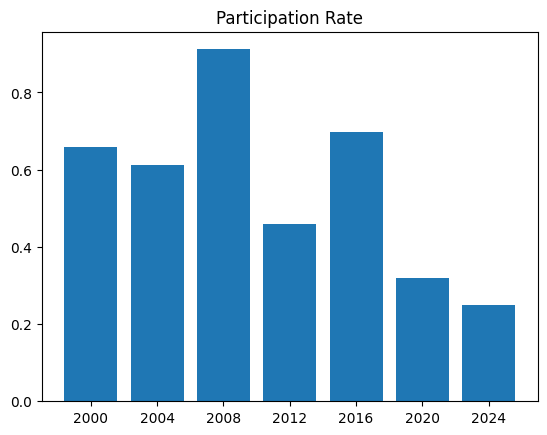

In [38]:
# plot
import matplotlib.pyplot as plt

plt.bar([i.split("-")[0] for i in voted["date"]], voted["rate"])
plt.title("Participation Rate")
plt.show()

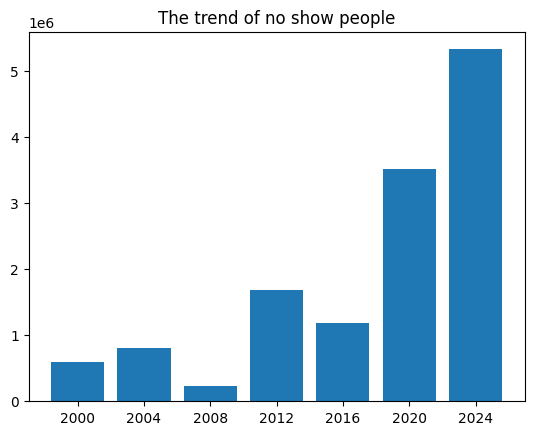

In [41]:
plt.bar([i.split("-")[0] for i in voted["date"]], voted["noshow_count"])
plt.title("The trend of no show people")
plt.show()

In [ ]:
# ((df["Presidential_Primary_2020_03_17"] != "Y") & (df["Presidential_Primary_2024_03_19"] == "Y")).sum()

np.int64(830343)

In [ ]:
# ((df["Presidential_Primary_2020_03_17"] != "Y") & (df["Presidential_Primary_2024_03_19"] == "Y")).sum() / total_rows

np.float64(0.1069994754037014)

In [34]:
# Total who voted on 2020
# print("Year 2020: ",(df["Presidential_Primary_2020_03_17"] == "Y").sum() / total_rows)
# print("Year 2024: ",(df["Presidential_Primary_2024_03_19"] == "Y").sum() / total_rows)

In [35]:
# df["Presidential_Primary_2024_03_19"] != "Y"

In [36]:
# (df["Presidential_Primary_2024_03_19"] == "Y").sum() / total_rows

In [ ]:
# df_change = df[df["Presidential_Primary_2020_03_17"] == "Y"]